# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Seperate the 2 variables N and t

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(1-\frac{N}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}}$

Substitution and Integration

$\int \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}} dN = \int r \times dt$

Separate Integration for each term 

$\int r \times dt = rt + C_1$

$\int \frac{1}{N} dN = \ln{N} + C_2$

For $\int \frac{\frac{1}{K}}{1 - \frac{N}{K}} dN$ 

Assume $u = 1 - \frac{N}{K}$ => $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N}{K}} + C_3$

$\ln{N} - \ln{1 - \frac{N}{K}} = \ln{\frac{N}{1-\frac{N}{K}}} = rt + C$

$\frac{N}{1-\frac{N}{K}} = e^{rt + C}$

$\frac{N}{1-\frac{N}{K}}= Ae^{rt}$

Obtain the equation in terms of N

$N = Ae^{rt} \times 1 - \frac{N}{K}$

$N = Ae^{rt} - Ae^{rt} \times \frac{N}{K}$

$N + Ae^{rt} \times \frac{N}{K} = Ae^{rt}$

$N\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

To obtain a value for A, let us consider an initial condition at time $t=0$

$Ae^0 = A$

$No = \frac{A}{1 + \frac{A}{K}}$

$No = \frac{AK}{K+A}$

$No(K+A) = AK$

$NoK + NoA = AK$

$NoA - AK = -NoK$

$AK -NoA = NoK$

$A = \frac{NoK}{K - No}$

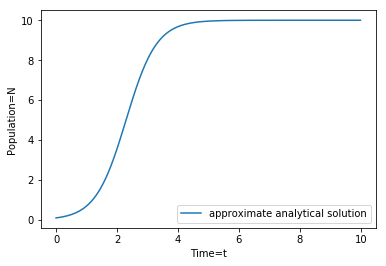

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (No*K)/(K-No)
N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximate analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Using scipy.integrate package function odeint

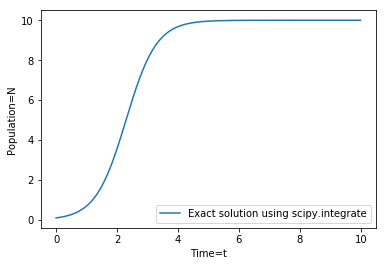

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
plt.show()


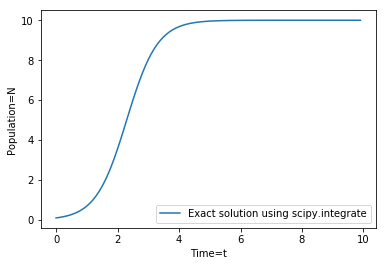

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# time steps: an array of values starting from 0 going up to 10, in steps of 0.1
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1

# let's define the right-hand side of the differential equation
# It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
def f(N, t, r, K):
    """Derivative functiion"""    
    return r*N*(1-N/K)

# The order of the arguments for ode function: the derivative function, the initial condition, the points where we want 
# the solution, and a list of parameters
N = odeint(f, No, t, (r, K))

# plot the solution
plt.plot(t, N)
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
plt.show()


Eulers method

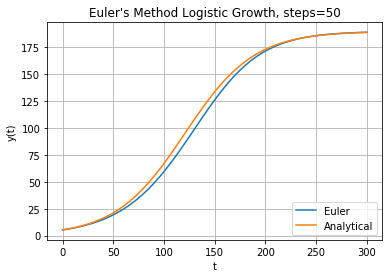

In [4]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# limits: 0.0 <= t <= 150
a = 0
b = 300
# Number of steps
nsteps = 50
# Carrying capacity
K = 189.4
# Growth rate
r = 0.029443
# step-size
h = (b-a)/nsteps
# initial value: 
initial = (0.0,5.3)
 
# Logistic growth rate differential equation
def f(N,K,r):
    return r*N*(1-(N/K))
 
# Create arrays to hold values of t and N
t = np.arange(a,b+h,h)
narray = np.zeros((nsteps+1,))
 
# set the initial values
t[0], narray[0] = initial
 
# Apply Euler's method
for i in range(1,nsteps+1):
    narray[i] = narray[i-1] + h*f(narray[i-1], K, r)
    
# Analytical solution
def y(t):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
   
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    #return K / (1 + (((K-5.3)/5.3)*np.exp(-r*t)))
    return N

# N = 50 steps
plt.plot(t, narray, label='Euler')
plt.plot(t, y(t), label='Analytical' )
plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()
plt.show()
#plt.savefig('euler_example_50steps.png', fmt='PNG', dpi=100)


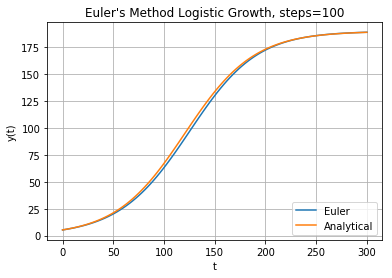

In [5]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

# limits: 0.0 <= t <= 150
a = 0
b = 300
 
# Number of steps
nsteps = 100

# Carrying capacity
K = 189.4

# Growth rate
r = 0.029443
 
# step-size
h = (b-a)/nsteps
 
# initial value: y(0.0) = 0.5
initial = (0.0,5.3)
 
# Logistic growth rate differential equation
def f(N,K,r):
    return r*N*(1-(N/K))
 
# Create arrays to hold values of t and N
t = np.arange(a,b+h,h)
narray = np.zeros((nsteps+1,))
 
# set the initial values
t[0], narray[0] = initial
 
# Apply Euler's method
for i in range(1,nsteps+1):
    narray[i] = narray[i-1] + h*f(narray[i-1], K, r)
    
# Exact solution
def y(t):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    return N
    #return K / (1 + (((K-5.3)/5.3)*np.exp(-r*t)))

# N = 100 steps
plt.plot(t, narray, label='Euler')
plt.plot(t, y(t), label='Analytical' )
plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()
plt.show()
#plt.savefig('euler_example_100steps.png', fmt='PNG', dpi=100)



## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [7]:
def Period(state,t, kin):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fc)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

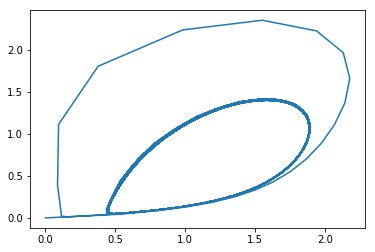

In [9]:
state0 = [0, 0, 0]
time = np.arange(0.0, 24*100, 1)
state = odeint(Period, state0, time, args = (0.02,))
plt.plot(state[:,0],state[:,1])#Why 'approximation'?
#plt.legend(loc=4)
plt.show()
#plt.savefig('Task2RelatedImage.png', fmt='PNG', dpi=100)

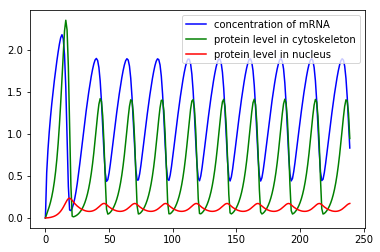

In [10]:
state0 = [0, 0, 0]
time = np.arange(0, 24*10, 1)
state = odeint(Period, state0, time, args = (0.02,))
labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
plt.plot (time, state[:,0], 'b', time, state[:,1], 'g', state[:,2], 'r')
plt.legend(labels, loc='best') 
plt.show()

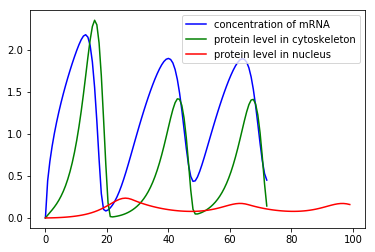

In [11]:
start = 0.0
end = 72
steps = 100
time = np.linspace(start, end, steps)
state0 = [0, 0, 0]
state = odeint(Period, state0, time, args = (0.02,))
labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
plt.plot (time, state[:,0], 'b', time, state[:,1], 'g', state[:,2], 'r')
plt.legend(labels, loc='best') 
plt.show()

### Part a with Vs = 1.5 for F(t)

Attempt 1

In [16]:
from scipy.signal import argrelextrema
def findPeriod(minkin, maxkin,stepsize,state0):
    h = 0.001
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        state = odeint(Period, state0, t, args=(x,))
        # Array containing the values of M
        Farray = state[:,1]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Farray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        if 21.49 < meanP < 21.51:
            # Append a tuple of (kin, mean period)
            Ps.append((x,meanP))
    return Ps
        

In [17]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
results = findPeriod(minkin, maxkin, stepsize, state0)
print(results)

[]


In [ ]:
for result in results:
    kin = result[0]
    period = result[1]
    state0 = [0, 0, 0]
    h = 0.001
    starttime = 0.0
    endtime = 100
    t = np.arange(starttime, endtime, h)
    state = odeint(Period, state0, time, args = (kin,))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, state[:,0], 'b', time, state[:,1], 'g', state[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()
    break

Attempt 2

In [ ]:
from scipy.signal import argrelextrema
def findPeriod(minkin, maxkin,stepsize,state0):
    h = 0.1
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        state = odeint(Period, state0, t, args=(x,))
        # Array containing the values of M
        Farray = state[:,1]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Farray, np.greater)
        #print(maxindices)
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
            #print("xlist: ",xlist)
            #print("Period: ")
            # Append a tuple of (kin, calculated period)
            
            if 21.49 < xlist[1]-xlist[0] < 21.51:
                #print(x, xlist[1]-xlist[0])
                Ps.append((x, xlist[1]-xlist[0]))
            #print(xlist[1]-xlist[0])
    #return Ps
    return Ps
        


In [ ]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
results = findPeriod(minkin, maxkin, stepsize, state0)
print(results)

In [ ]:
for result in results:
    kin = result[0]
    period = result[1]
    state0 = [0, 0, 0]
    h = 0.1
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    state = odeint(Period, state0, time, args = (kin,))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, state[:,0], 'b', time, state[:,1], 'g', state[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()
    break
 

        
        

### Part a with Vs = 1.5 for M(t)

In [ ]:
from scipy.signal import argrelextrema
def findPeriod(minkin, maxkin,stepsize,state0):
    h = 0.001
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    Ps = []
    kinvalues = np.arange(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        state = odeint(Period, state0, t, args=(x,))
        # Array containing the values of M
        Marray = state[:,0]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Marray, np.greater)
        #print(maxindices)
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
            #print("xlist: ",xlist)
            #print("Period: ")
            # Append a tuple of (kin, calculated period)
           
            if 21.49 < xlist[1]-xlist[0] < 21.51:
                #print(x, xlist[1]-xlist[0])
                Ps.append((x, xlist[1]-xlist[0]))
            #print(xlist[1]-xlist[0])
    return Ps
        

In [ ]:
minkin = 0.01
maxkin = 0.1
stepsize = 0.0001
state0 = [0, 0, 0]
results = findPeriod(minkin, maxkin, stepsize, state0)
print(results)

In [ ]:
for kin, period in results:
    state0 = [0, 0, 0]
    h = 0.001
    starttime = 0.0
    endtime = 1000
    t = np.arange(starttime, endtime, h)
    state = odeint(Period, state0, time, args = (kin,))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, state[:,0], 'b', time, state[:,1], 'g', state[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()